<a href="https://colab.research.google.com/github/hanifroyyanramadhan/praktikum_pembelajaran_mesin/blob/main/UTS_PembelajaranMesin_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS Pembelajaran Mesin

Nim, Nama, Kelas : HANIF ROYYAN RAMADHAN 1197050046 D

# Topik Mini Riset

Mini Riset ini mengenai Diabetes Prediction dengan menggunakan Logistic Regression

#Data Understanding

Dataset ini tersedia di kaggle website: https://www.kaggle.com/uciml/pima-indians-diabetes-database, Dataset ini berasal dari National Institute of Diabetes and Digestive and Ginjal Diseases. Tujuan dari dataset adalah untuk memprediksi secara diagnostik apakah pasien memiliki diabetes.


*   Pregnancies = Jumlah kehamilan
*   Glucose = konsentrasi glukosa 2 jam dalam tes toleransi glukosa oral
*   BloodPressure = Tekanan darah diastolik (mm Hg)
*   SkinThickness = Ketebalan lipatan kulit (mm)
*   Insulin = 2-Jam serum insulin (mu U / ml)
*   BMI = Indeks massa tubuh (berat dalam kg / (tinggi dalam m) ^ 2)
*   DiabetesPedigreeFunction = Riwayat keturunan diabetes
*   Age = Umur (tahun)
*   Variabel Outcome = Class (0 atau 1) 268 dari 768 adalah 1, yang lain adalah 0

#Data Preparation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files
url = 'https://raw.githubusercontent.com/hanifroyyanramadhan/praktikum_pembelajaran_mesin/main/diabetes.csv'
dataset = pd.read_csv(url)

In [2]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Data Exploration

In [6]:
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

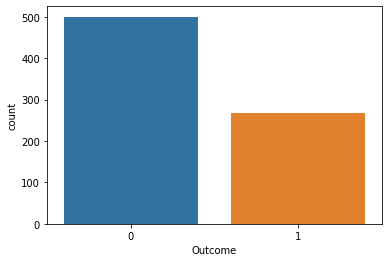

In [7]:
sns.countplot(x='Outcome', data=dataset)

#Distribusi Variabel Independen

Variabel Pregnancies

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


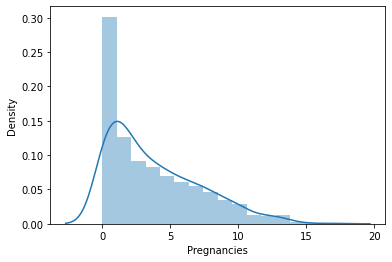

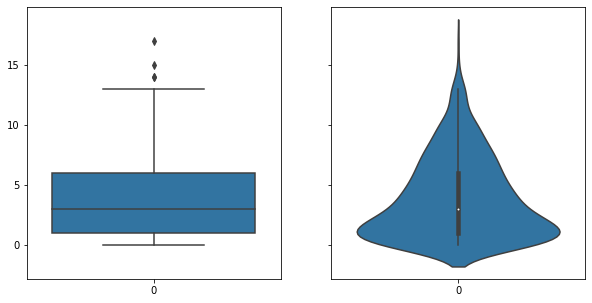

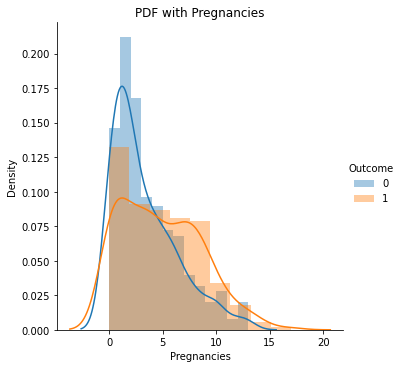

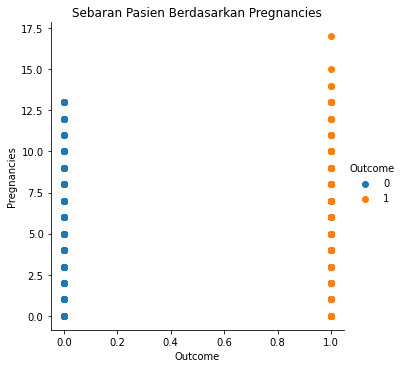

In [8]:
print(sns.distplot(dataset['Pregnancies']))

_, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))
sns.boxplot(data=dataset['Pregnancies'], ax=axes[0]);
sns.violinplot(data=dataset['Pregnancies'], ax=axes[1])

sns.FacetGrid(data=dataset, hue='Outcome', height=5) \
 .map(sns.distplot, 'Pregnancies') \
 .add_legend()
plt.title('PDF with Pregnancies')
plt.show()

sns.FacetGrid(data=dataset, hue='Outcome', height=5) \
 .map(plt.scatter, 'Outcome', 'Pregnancies')\
 .add_legend()
plt.title('Sebaran Pasien Berdasarkan Pregnancies')
plt.show()

Glucose

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


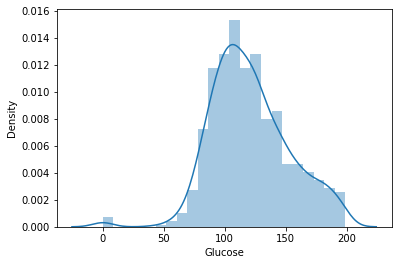

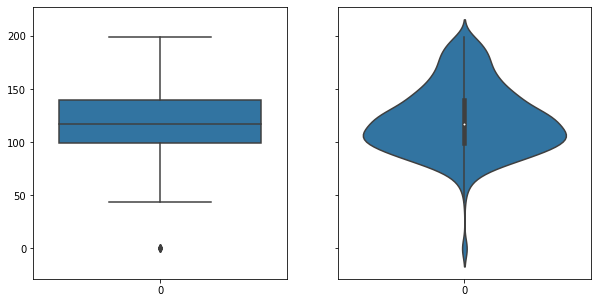

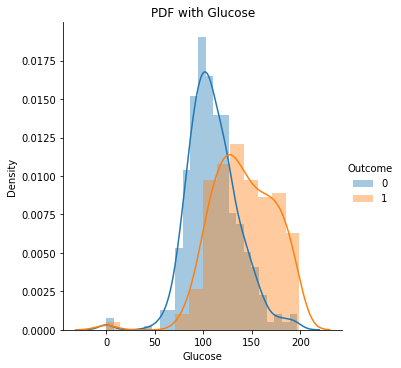

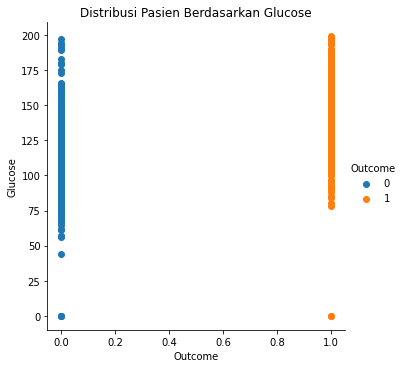

In [9]:
print(sns.distplot(dataset['Glucose']))

_, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))
sns.boxplot(data=dataset['Glucose'], ax=axes[0]);
sns.violinplot(data=dataset['Glucose'], ax=axes[1]);

sns.FacetGrid(dataset, hue="Outcome", height=5) \
 .map(sns.distplot, "Glucose") \
 .add_legend()
plt.title('PDF with Glucose')
plt.show()

sns.FacetGrid(dataset, hue = 'Outcome', height = 5)\
.map(plt.scatter, 'Outcome', 'Glucose')\
.add_legend()
plt.title('Distribusi Pasien Berdasarkan Glucose')
plt.show()

Blood Pressure

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

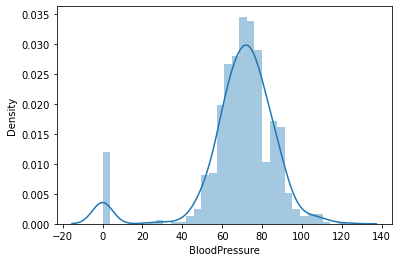

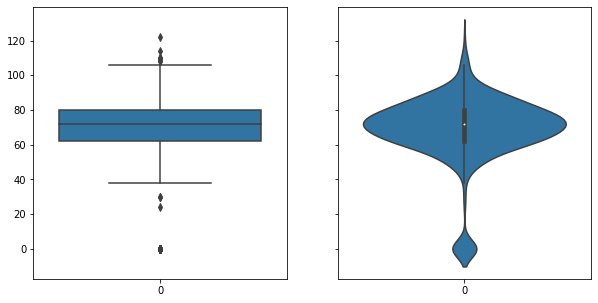

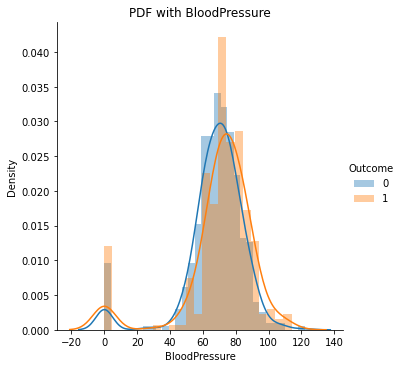

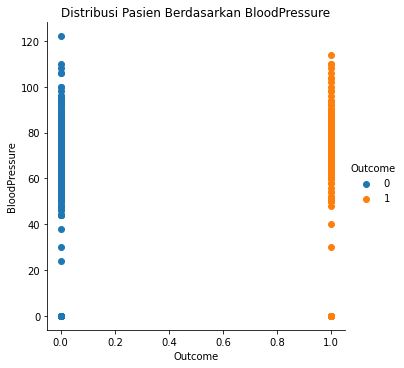

In [10]:
sns.distplot(dataset['BloodPressure'])

_, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))
sns.boxplot(data=dataset['BloodPressure'], ax=axes[0]);
sns.violinplot(data=dataset['BloodPressure'], ax=axes[1]);

sns.FacetGrid(dataset, hue="Outcome", height=5) \
 .map(sns.distplot, "BloodPressure") \
 .add_legend()
plt.title('PDF with BloodPressure')
plt.show()

sns.FacetGrid(dataset, hue = 'Outcome', height = 5)\
.map(plt.scatter, 'Outcome', 'BloodPressure')\
.add_legend()
plt.title('Distribusi Pasien Berdasarkan BloodPressure')
plt.show()

SkinThickness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

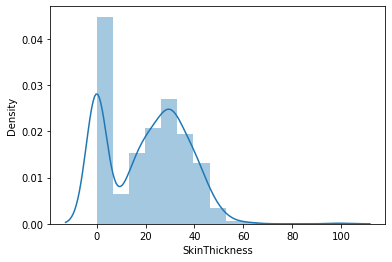

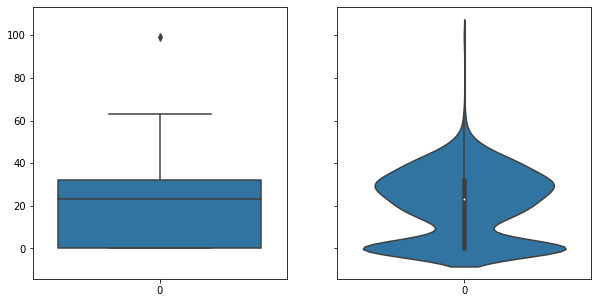

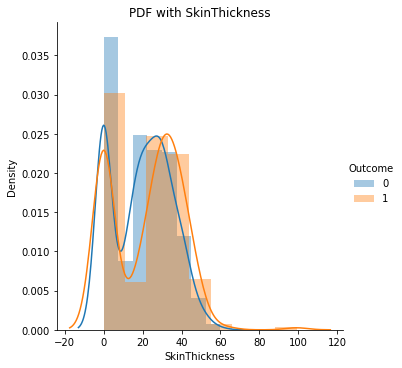

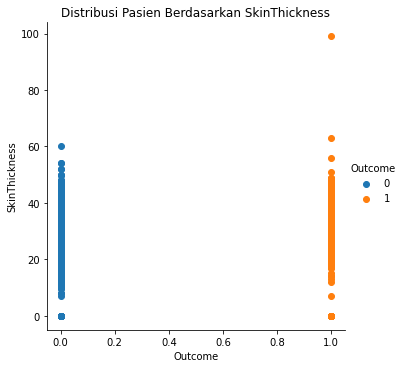

In [11]:
sns.distplot(dataset['SkinThickness'])

_, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))
sns.boxplot(data=dataset['SkinThickness'], ax=axes[0]);
sns.violinplot(data=dataset['SkinThickness'], ax=axes[1]);

sns.FacetGrid(dataset, hue="Outcome", height = 5) \
 .map(sns.distplot, "SkinThickness") \
 .add_legend()
plt.title('PDF with SkinThickness')
plt.show()

sns.FacetGrid(dataset, hue = 'Outcome', height = 5)\
.map(plt.scatter, 'Outcome', 'SkinThickness')\
.add_legend()
plt.title('Distribusi Pasien Berdasarkan SkinThickness')
plt.show()

Insulin

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

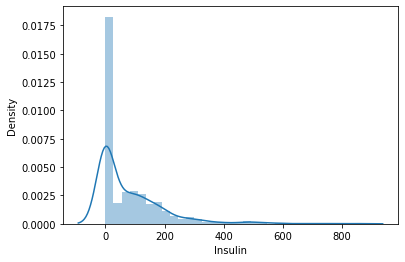

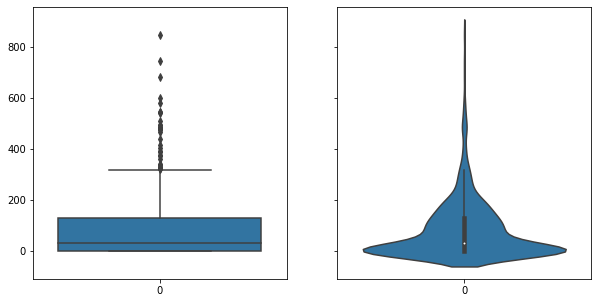

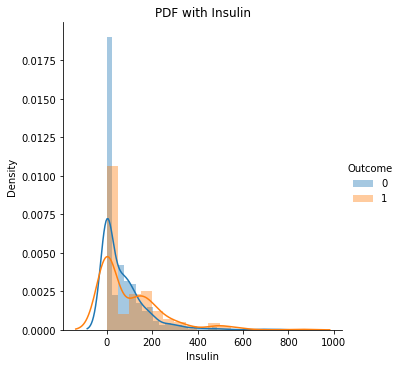

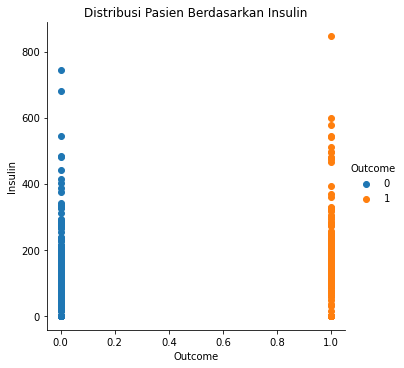

In [12]:
sns.distplot(dataset['Insulin'])

_, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))
sns.boxplot(data=dataset['Insulin'], ax=axes[0]);
sns.violinplot(data=dataset['Insulin'], ax=axes[1]);

sns.FacetGrid(dataset, hue="Outcome", height=5) \
 .map(sns.distplot, "Insulin") \
 .add_legend()
plt.title('PDF with Insulin')
plt.show()

sns.FacetGrid(dataset, hue = 'Outcome', height = 5)\
.map(plt.scatter, 'Outcome', 'Insulin')\
.add_legend()
plt.title('Distribusi Pasien Berdasarkan Insulin')
plt.show()

BMI

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

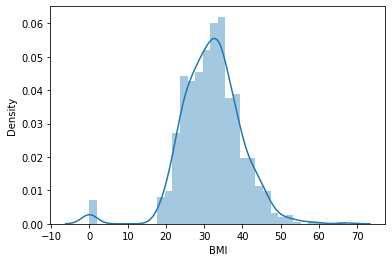

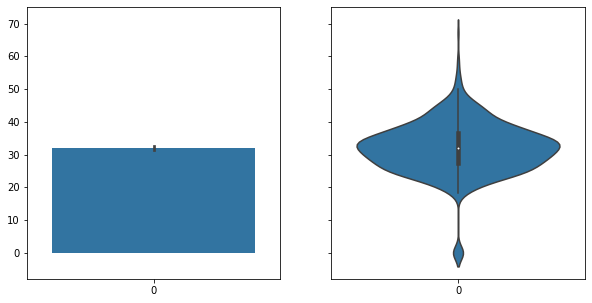

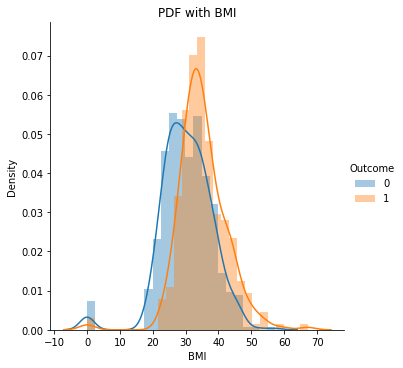

<function matplotlib.pyplot.show>

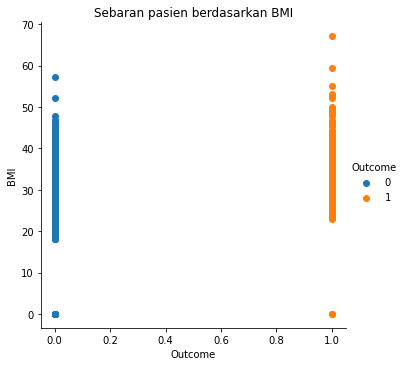

In [13]:
sns.distplot(dataset['BMI'])

_, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))
sns.barplot(data=dataset['BMI'], ax=axes[0]);
sns.violinplot(data=dataset['BMI'], ax=axes[1]);

sns.FacetGrid(dataset, hue='Outcome', height=5) \
 .map(sns.distplot, 'BMI') \
 .add_legend()
plt.title('PDF with BMI')
plt.show()

sns.FacetGrid(dataset, hue='Outcome', height=5) \
 .map(plt.scatter, 'Outcome', 'BMI') \
 .add_legend()
plt.title('Sebaran pasien berdasarkan BMI')
plt.show

DiabetesPedigreeFunction

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

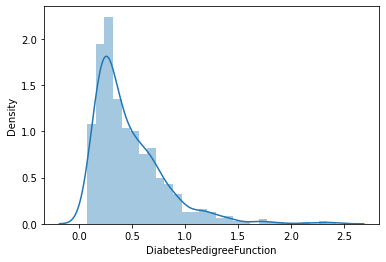

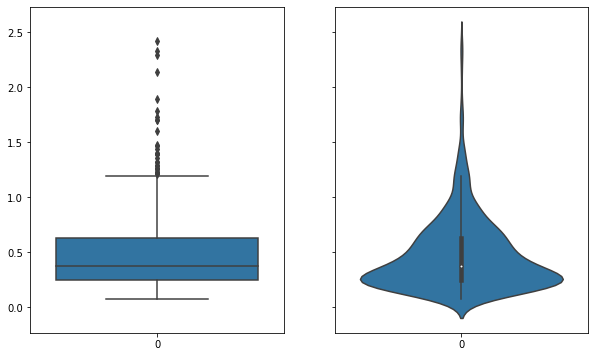

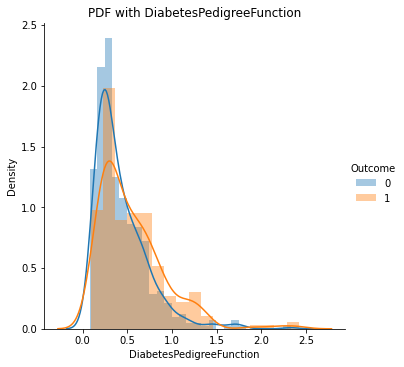

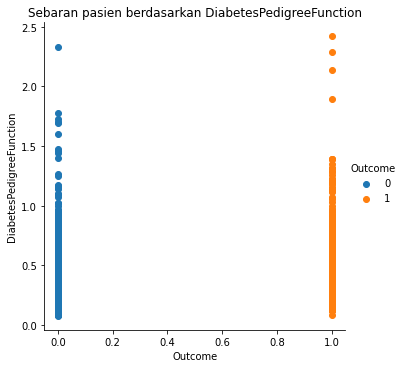

In [14]:
sns.distplot(dataset['DiabetesPedigreeFunction'])

_, axes = plt.subplots(1,2, sharey=True, figsize=(10,6))
sns.boxplot(data=dataset['DiabetesPedigreeFunction'], ax=axes[0]);
sns.violinplot(data=dataset['DiabetesPedigreeFunction'], ax=axes[1])

sns.FacetGrid(data=dataset, hue='Outcome', height=5) \
 .map(sns.distplot, 'DiabetesPedigreeFunction') \
 .add_legend()
plt.title('PDF with DiabetesPedigreeFunction')
plt.show

sns.FacetGrid(data=dataset, hue='Outcome', height=5) \
 .map(plt.scatter, 'Outcome','DiabetesPedigreeFunction') \
 .add_legend()
plt.title('Sebaran pasien berdasarkan DiabetesPedigreeFunction')
plt.show()

Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

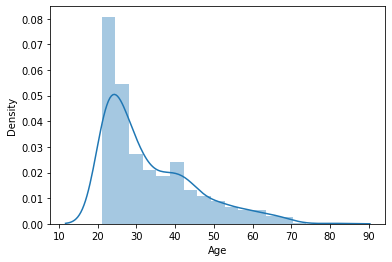

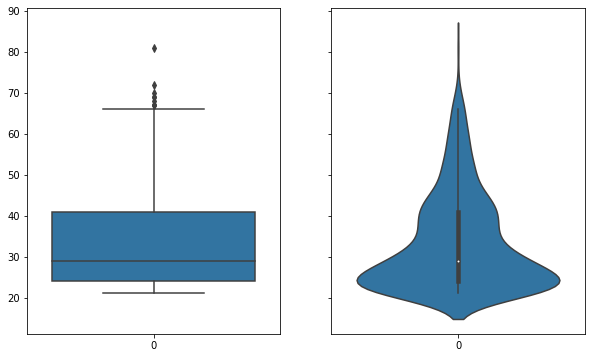

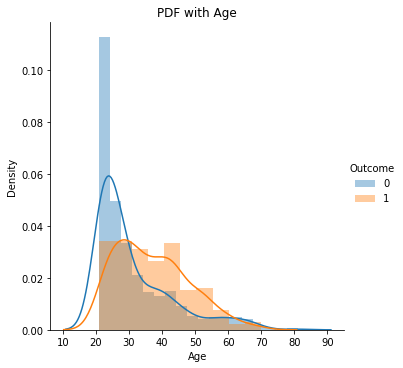

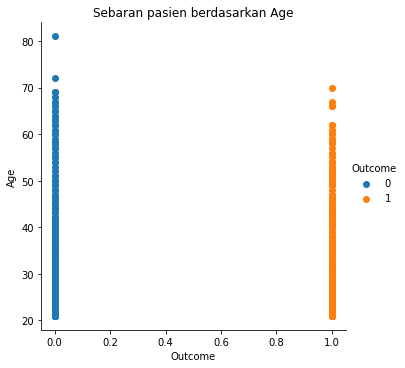

In [15]:
sns.distplot(dataset['Age'])

_, axes = plt.subplots(1,2, sharey=True, figsize=(10,6))
sns.boxplot(data=dataset['Age'], ax=axes[0]);
sns.violinplot(data=dataset['Age'], ax=axes[1])

sns.FacetGrid(data=dataset, hue='Outcome', height=5) \
 .map(sns.distplot, 'Age') \
 .add_legend()
plt.title('PDF with Age')
plt.show

sns.FacetGrid(data=dataset, hue='Outcome', height=5) \
 .map(plt.scatter, 'Outcome','Age') \
 .add_legend()
plt.title('Sebaran pasien berdasarkan Age')
plt.show()

Rekap Visualisasi

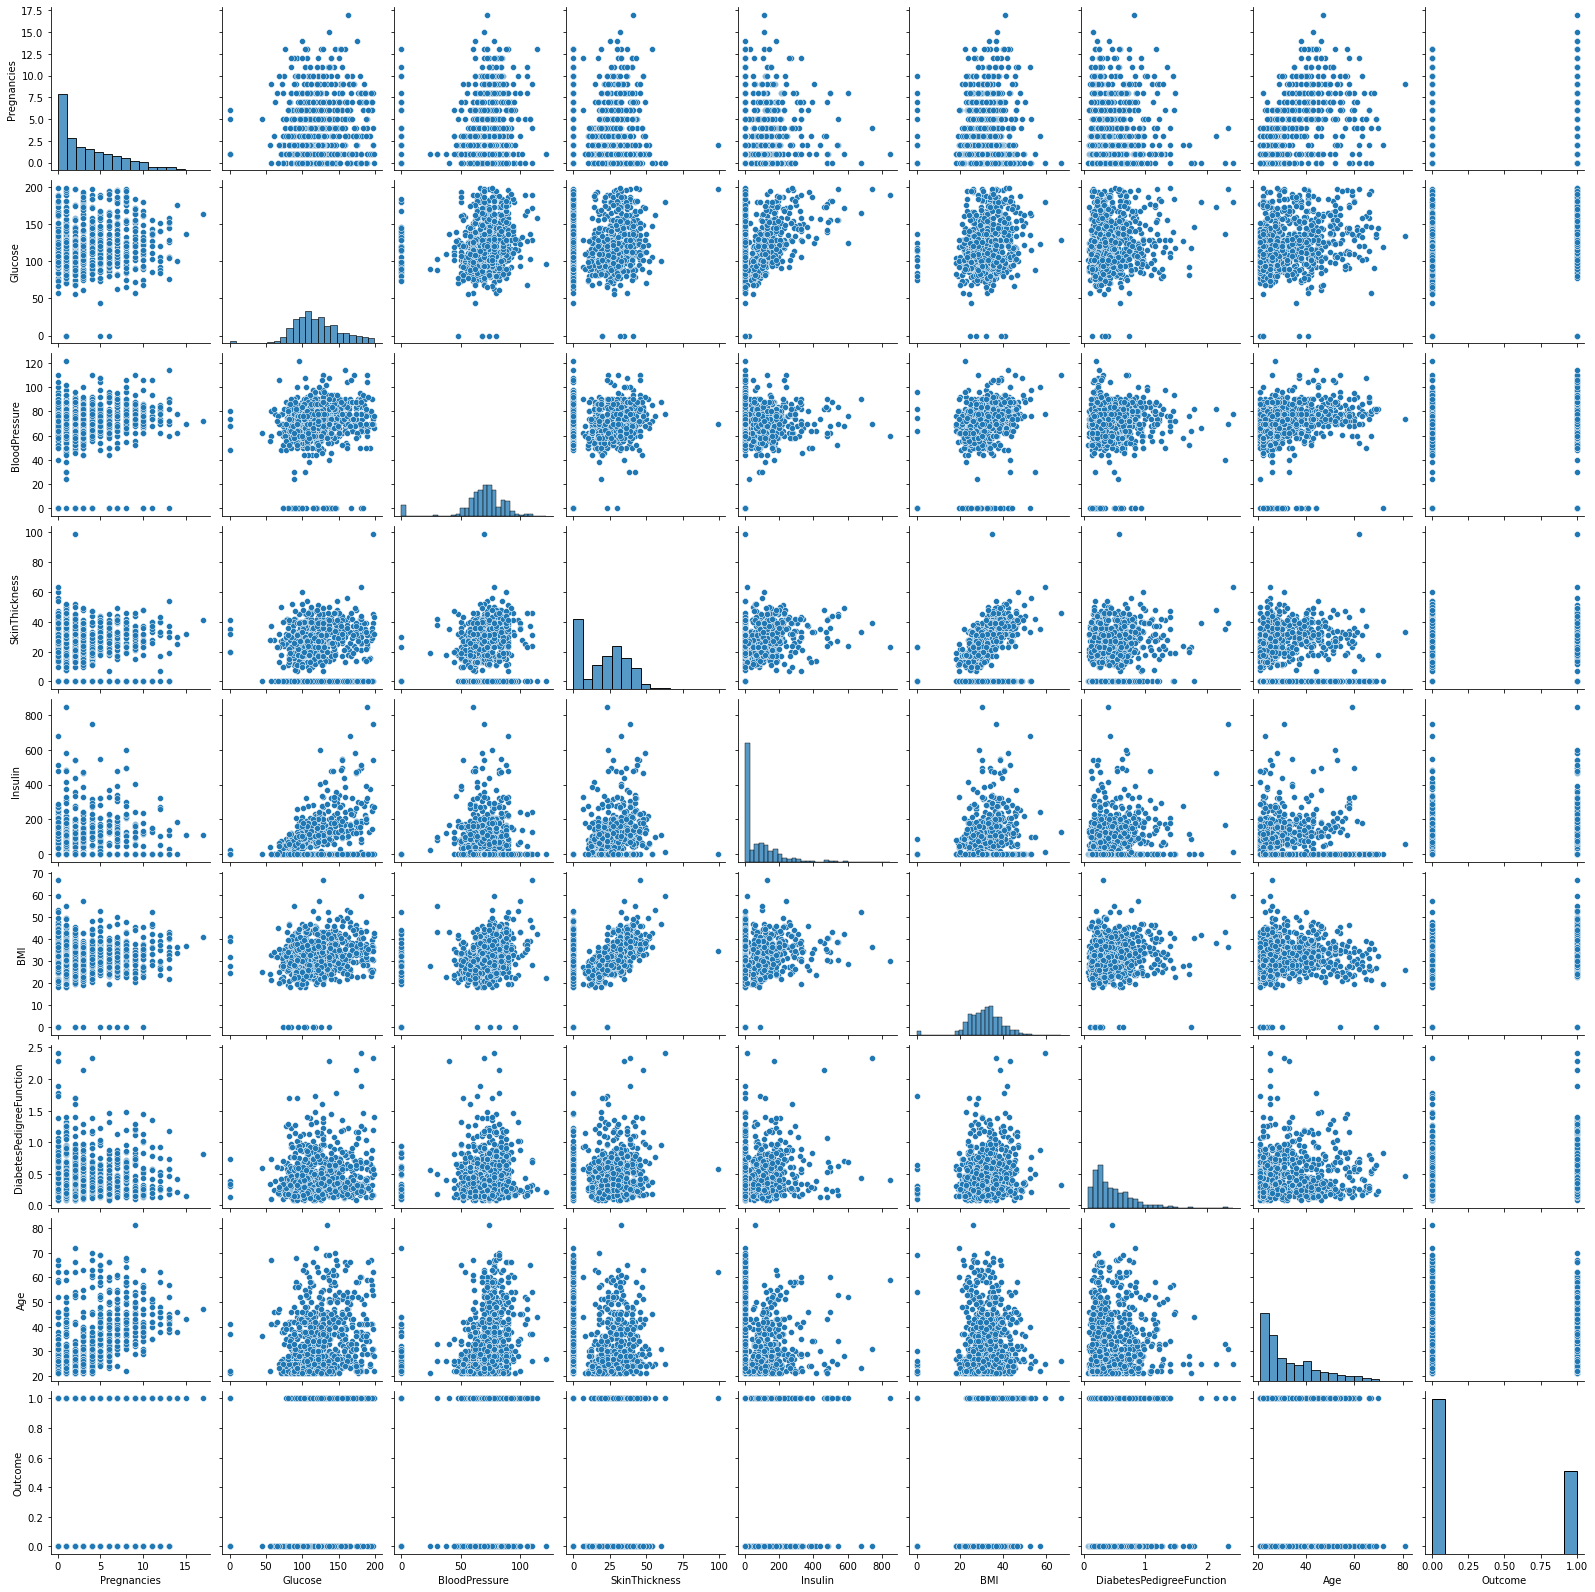

In [16]:
sns.pairplot(data=dataset)

#Building the Model

**Logistic Regression**

Regresi Logistik adalah salah satu tipe analisis regresi di statistik yang digunakan untuk memprediksi sebuah keluaran variabel dependen yang menjadi prediktor dari variabel independen. didalam regresi logistik banyak digunakan untuk memprediksi dan juga menghitung kesuksesan probabilitas

In [17]:
#Membuat variabel konstanta
from statsmodels.tools import add_constant as add_constant
dataset_df = add_constant(dataset)
dataset_df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,6,148,72,35,0,33.6,0.627,50,1
1,1.0,1,85,66,29,0,26.6,0.351,31,0
2,1.0,8,183,64,0,0,23.3,0.672,32,1
3,1.0,1,89,66,23,94,28.1,0.167,21,0
4,1.0,0,137,40,35,168,43.1,2.288,33,1


In [18]:
import statsmodels.api as sm
column = dataset_df.columns[:-1]
model = sm.Logit(dataset_df.Outcome, dataset_df[column])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Sat, 23 Apr 2022   Pseudo R-squ.:                  0.2718
Time:                        05:56:04   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

Dari tabel diatas dapat dilihat bahwa variabel yang lebih dari 5% (>0.05) menunjukkan tidak mempengaruhi hubungan yang signifikan dengan diabetes. maka dari itu variabel tersebut harus dikeluarkan dengan variabel yg memiliki Pvalue terbesar (SkinThickness). hal itu dilakukan berulang sampai tidak ada variabel yang melebihi 0.05

**Backward Elimination**

In [19]:
def back_feature_elem (data_frame,dep_var,col_list):
   
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(dataset_df,dataset.Outcome,column)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                            5
Date:                Sat, 23 Apr 2022   Pseudo R-squ.:                  0.2667
Time:                        05:56:47   Log-Likelihood:                -364.28
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.442e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -7.9550      0.676    -11.771      0.000      -9.280      -6.630
Pregnancies                  0.1535      0.028      5.514      0.000       0.099       0.208
Glucose                      0.0347      0.003     10.213      0.000       0.028       0.041
BloodPressure               -0.0120      0.005     -2.387      0.017      -0.022      -0.002
BMI                          0.0848      0.014      6.006      0.000       0.057       0.113
DiabetesPedigreeFunction     0.9106      0.294      3.097      0.002       0.334       1.487
============================================================================================
"""

**Interpreting the Results: Odds Ratio, Confidence Interval and Pvalues**

In [20]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['Pvalue']=pvalue
conf.columns = ['CI 95%', 'CI 97%', 'Odds Ratio', 'Pvalue']
print((conf))

                            CI 95%    CI 97%  Odds Ratio  Pvalue
const                     0.000093  0.001320    0.000351   0.000
Pregnancies               1.103996  1.231273    1.165899   0.000
Glucose                   1.028403  1.042174    1.035265   0.000
BloodPressure             0.978371  0.997855    0.988065   0.017
BMI                       1.058812  1.119090    1.088534   0.000
DiabetesPedigreeFunction  1.397024  4.423410    2.485882   0.002


**Spliting Data**

In [21]:
X = dataset.iloc[:,[0,1,2,5,6]].values
y = dataset.iloc[:, 8].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=0)

from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state=0)
lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)

#Model Testing/Evaluation

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
akurasi = metrics.accuracy_score(y_test,y_pred)
print(cm)
print(cr)
print('akurasi yang dimiliki oleh model: %0.2f ' %(akurasi*100),'%')

[[118  12]
 [ 25  37]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.86       130
           1       0.76      0.60      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.75      0.77       192
weighted avg       0.80      0.81      0.80       192

akurasi yang dimiliki oleh model: 80.73  %


**Confusion Matrix**

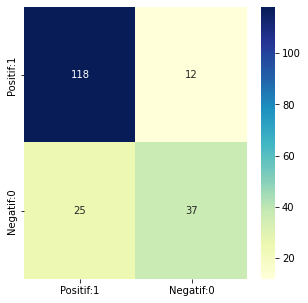

In [23]:
from pandas import DataFrame
conf_matrix = pd.DataFrame(data=cm, columns=['Positif:1', 'Negatif:0'], index=['Positif:1','Negatif:0'])
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

Confusion Matrix menunjukkan 113 + 36 = 149 data prediksi benar dan 26+11 = 37 data prediksi salah

True Positive = 113

True Negative = 36

False Positive = 11

False Negative = 26

In [24]:
TP = cm[1,1]
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

**Model Evaluasi**

In [25]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',
      
'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)   

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8072916666666666 
 The Missclassification = 1-Accuracy =  0.19270833333333337 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.5967741935483871 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9076923076923077 
 Positive Predictive value = TP/(TP+FP) =  0.7551020408163265 
 Negative predictive Value = TN/(TN+FN) =  0.8251748251748252 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  6.46505376344086 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.44423182066703115


**Predicted Probabillities**

In [26]:
y_pred_prob=lreg.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['no Diabetes','Diabetes'])
y_pred_prob_df.head()

,no Diabetes,Diabetes
0,0.044232,0.955768
1,0.813648,0.186352
2,0.894060,0.105940
3,0.409532,0.590468
4,0.889332,0.110668


**Kurva ROC**

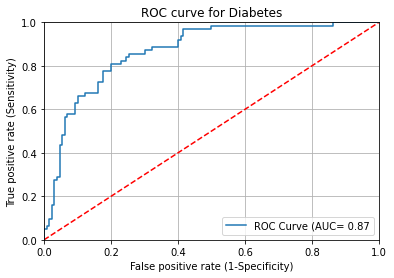

In [27]:
from sklearn.metrics import roc_curve
import sklearn

logistik=lreg.predict_proba(X_test)
AUC = sklearn.metrics.roc_auc_score(y_test,logistik[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logistik[:,1])

#Plotting AUC=0.5 Red Line
plt.plot([0,1],[0,1],color='red', linestyle = '--')

#Plotting ROC Graph (Blue)
plt.plot(fpr,tpr, label='ROC Curve (AUC= %0.2f' % AUC)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Diabetes')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid(True)

#Kesimpulan

1.   Semua atribut yang dipilih setelah proses eliminasi menunjukkan Pvalues lebih rendah dari 5% dan dengan demikian menunjukkan peran signifikan dalam prediksi penyakit Diabetes.
2. BMI yang tinggi memiliki resiko 2 kali terkena penyakit Diabetes. kehamilan, glukosa, tekanan darah, dan Riwayat Keturunan juga berpengaruh dengan terjadinya penyakit Diabetes.
3. Model diprediksi dengan akurasi 81%. Model ini lebih spesifik daripada sensitif.
4. Area di bawah kurva ROC adalah 87% yang menunjukkan model cukup memuaskan.
5. Model keseluruhan dapat ditingkatkan dengan lebih banyak data.